In [1]:
import numpy as np 
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels) , (test_data, test_labels) = mnist.load_data()

In [3]:
train_data.shape 

(60000, 28, 28)

In [4]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

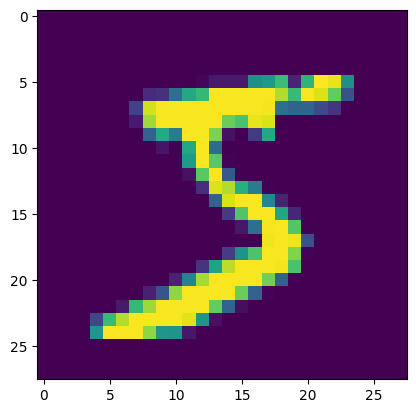

In [5]:
plt.imshow(train_data[0]) #mostrar la primera imagen

In [6]:
model = models.Sequential() #contruye redes neuronales aplicando capas de forma lineal 
#agregando capas
model.add(layers.Dense(512,activation='relu' , input_shape=(28*28,))) #construye la primera capa densa de 512 neuronas de 28x28pixeles
model.add(layers.Dense(10,activation='softmax'))#de 10  neuronas la segunda capa porque son 10 posibles salidas

c:\Users\fisica\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#compilar la red neuronal dejando un optimizador llamdo  y una funcion de perdida categoicl t una metrica de exito accuracy
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()#red neuronal secuancial con dos tipos de datos 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#entrenando el modelo
#cambiando´rimero la forma de los datos
x_train = train_data.reshape((60000,28*28))#bajar a dos dimencionas para facilitar la red neuronal
x_train = x_train.astype('float32')/255 #es mas facil manjear float y /255 es el numero maximo para que me de numero de 0 a 1

x_test = test_data.reshape((10000,28*28))#bajar a dos dimencionas para facilitar la red neuronal
x_test = x_test.astype('float32')/255 #es mas facil manjear float y /255 es el numero maximo para que me de numero de 0 a 1

In [10]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
#hacer una transformacion a los labels
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [12]:
train_labels[0]

np.uint8(5)

In [13]:
y_train[0]#muestra las posibles salidas pero muestra un 1 donde debe ir 

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [14]:
#entrenando la red 

model.fit(x_train, y_train, epochs=5, batch_size=128)#itera 5 epocas o interacciones con lotes de 128 unidades

#cada vez qye entrenaba la precision sube pero la perdidabaja 

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8673 - loss: 0.4478
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9652 - loss: 0.1206
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9780 - loss: 0.0733
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9849 - loss: 0.0506
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9891 - loss: 0.0377


In [15]:
#evaluando como funaciona la red de datos 
model.evaluate(x_test,y_test)  #tiene una muy buena presicion para el analisis de estos numeros

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9780 - loss: 0.0721


[0.061019085347652435, 0.9815000295639038]

In [16]:
#que es una neurona
"""se llama perceptron fue inspirado en redes neuronales biologicas 
    funciona con entradas: x1 y x2 y pesos por dentro de ella se hace sumas poneradas con una formula parecida a una regecion lineal 
    se tiene las entradas y los datos, dentro hace la suma ponderada, pasa por una funcion de activacion 
    se cambian los pesos para resolver el probelma 
    
    bias: funciona para desplazar la curva en alguna direccion y le da elasticidad 
    
    
    
"""

'se llama perceptron fue inspirado en redes neuronales biologicas \n    funciona con entradas: x1 y x2 y pesos por dentro de ella se hace sumas poneradas con una formula parecida a una regecion lineal \n    se tiene las entradas y los datos, dentro hace la suma ponderada, pasa por una funcion de activacion \n    se cambian los pesos para resolver el probelma \n    \n    bias: funciona para desplazar la curva en alguna direccion y le da elasticidad \n    \n    \n    \n'

arquitectira de la red neuronal :

la red neuronal se maneja por capaz donde cada capa le manda informaciona la siguiente
entre mas capas la informacion es mas precisa

la capa inicial se llama capa de input : reciben la imformacion
luego vienen las capas ocultas : procesan la informacion de manera especfica scanado caracteristicas
y la ultima capa es la capa de salida la que dice las predicciones en los datos : se encaga de presiccion o clasificacion 

redes nerinales : vectores 

cada neurona se evalua con pesos (productos puntos) 

funciones de activacion 
no se puede apilar sumatorias de de lineas seguidas 
entonces se usa funciones de activacion discretas y continuas 
* funcion de activacion continua: valores dentro de un conjunto de intervalos 
* funcion de activacion discreta: conjunto finitos de valores 


en la compuerta and se usa una activacion discreta la cual decia si es mayor o igual a 0 sale 1 pero si no va a poner 0, se llama funcion escalonada o threshold
* funcion escalonada o threshold: es una escalera como un heviside (util para dos salidas)
* funcion sigma: es similar pero esta va de -1 a 1 para datos tambien negativos 
* funcion sigmoide: va de 0 a 1 con valores continuo ( para probabilidad) desventajas como para valores pequeños siempre van al 0 o si hay valores muy grande se van al 1, tiene derivadas  
* funcioon trangente hiperbolica: es la misma sigmide pero para -1 a 1
* funcion lineal rectificada(Relu): no es unafuncion lineal porque , si el valor es menor a cero es cero y si si no lo es deja el valor que viene, ( mas usada para capas ocultas) y tiene derivada 
* funcion softmax= da la probabilidad de cada una de las posibles salidas, ej en el mnist da la probabilidad del 0 al 9 

In [17]:
import numpy as np
import plotly.express as px


In [18]:
def sigmoide(a):
    return 1/(1+np.exp(-a))

In [19]:


x = np.linspace(-10, 10, 100)
px.line(x=x, y=sigmoide(x))


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': ('AAAAAAAAJMBDYt7OkJgjwIbEvJ0hMS' ... 'ydITEjQERi3s6QmCNAAAAAAAAAJEA='),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('YNkd5DLNBz/+4HFcOSENP1nOyTJK0x' ... '5lcf/vPziOGnuL/+8/iW80y6D/7z8='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})

In [20]:
#funcion de paso step o escalonada 
def step(x):
    return np.piecewise(x,[x<0.0,x>0.0],[0,1])

In [21]:
#graficando 
px.line(x=x, y=step(x))

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': ('AAAAAAAAJMBDYt7OkJgjwIbEvJ0hMS' ... 'ydITEjQERi3s6QmCNAAAAAAAAAJEA='),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAAAAAAAAAAAAAAAAAAAAAAAAAA' ... 'AAAADwPwAAAAAAAPA/AAAAAAAA8D8='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})

In [26]:
#relu
def relu(x):
    return np.piecewise(
        x,
        [x < 0, x >= 0],
        [0, lambda x: x]
    )
px.line(x=x, y=relu(x))

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': ('AAAAAAAAJMBDYt7OkJgjwIbEvJ0hMS' ... 'ydITEjQERi3s6QmCNAAAAAAAAAJEA='),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAAAAAAAAAAAAAAAAAAAAAAAAAA' ... 'ydITEjQERi3s6QmCNAAAAAAAAAJEA='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})